<a href="https://colab.research.google.com/github/valogonor/How-Representative-Is-the-U.S.-Congress/blob/master/How_We_Voted_and_What_We_Got.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving nst-est2017-alldata.csv to nst-est2017-alldata.csv


In [0]:
import pandas as pd
df = pd.read_csv('nst-est2017-alldata.csv')
df.tail()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2017,SENPARTY2019
52,40,4,9,53,Washington,7405743,Democrats
53,40,3,5,54,West Virginia,1815857,Both
54,40,2,3,55,Wisconsin,5795483,Both
55,40,4,8,56,Wyoming,579315,Republicans
56,40,X,X,72,Puerto Rico,3337177,NaN


In [0]:
df.drop(56, inplace=True)
df.tail()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2017,SENPARTY2019
51,40,3,5,51,Virginia,8470020,Democrats
52,40,4,9,53,Washington,7405743,Democrats
53,40,3,5,54,West Virginia,1815857,Both
54,40,2,3,55,Wisconsin,5795483,Both
55,40,4,8,56,Wyoming,579315,Republicans


In [0]:
import numpy as np
import matplotlib.patches as mpatches

# Function courtesy of CognitiveClass.ai course on Data Visualization with Python
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
#     fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
#     plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    colors = np.array([0, sum(values)]) # needed to add this to get the right colors
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(colors[i])/total_values) # changed values_cumsum[i] to colors[i]
        print("Color val: " + str(color_val))
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [0]:
import matplotlib.pyplot as plt

width = 29 # width of chart
height = 15 # height of chart

categories = ["Democrats", "Republicans"] # categories
values = [235, 200] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 435
Democrats: 235
Republicans: 200
Color val: (0.2298057, 0.298717966, 0.753683153, 1.0)
Color val: (0.705673158, 0.01555616, 0.150232812, 1.0)


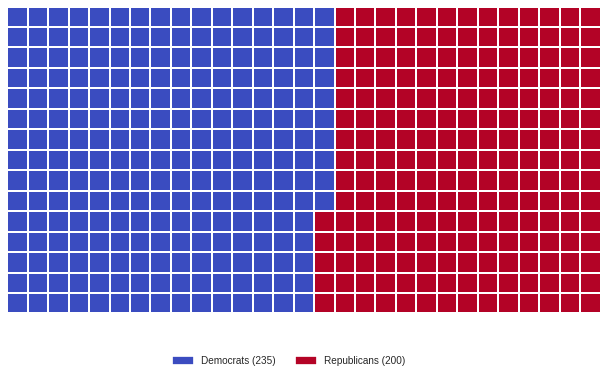

In [0]:
create_waffle_chart(categories, values, height, width, colormap);

In [0]:
width = 10 # width of chart
height = 10 # height of chart

categories = ["Senate Democrats", "Senate Republicans"] # categories
values = [47, 53] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 100
Senate Democrats: 47
Senate Republicans: 53
Color val: (0.2298057, 0.298717966, 0.753683153, 1.0)
Color val: (0.705673158, 0.01555616, 0.150232812, 1.0)


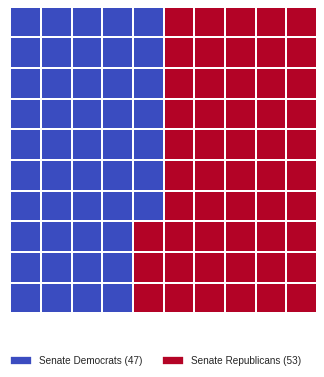

In [0]:
create_waffle_chart(categories, values, height, width, colormap);

In [0]:
df_dem = df[df.SENPARTY2019 == "Democrats"]
df_rep = df[df.SENPARTY2019 == "Republicans"]
df_both = df[df.SENPARTY2019 == "Both"]
df_both

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2017,SENPARTY2019
5,40,3,6,1,Alabama,4874747,Both
7,40,4,8,4,Arizona,7016270,Both
10,40,4,8,8,Colorado,5607154,Both
24,40,1,1,23,Maine,1335907,Both
31,40,4,8,30,Montana,1050493,Both
40,40,2,3,39,Ohio,11658609,Both
43,40,1,2,42,Pennsylvania,12805537,Both
53,40,3,5,54,West Virginia,1815857,Both
54,40,2,3,55,Wisconsin,5795483,Both


In [0]:
sum(df_both.POPESTIMATE2017)

51960057

In [0]:
sum(df_dem.POPESTIMATE2017)

143753032

In [0]:
round((sum(df_dem.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0] * 100, 1)

52.1

In [0]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2017,SENPARTY2019
0,10,0,0,0,United States,325719178,NaN
1,20,1,0,0,Northeast Region,56470581,NaN
2,20,2,0,0,Midwest Region,68179351,NaN
3,20,3,0,0,South Region,123658624,NaN
4,20,4,0,0,West Region,77410622,NaN


In [0]:
df.POPESTIMATE2017[0]

325719178

In [0]:
width = 40 # width of chart
height = 10 # height of chart

categories = ["% Population Represented by 47 Senate Democrats", "% Population Represented by 53 Senate Republicans"] # categories
values = [round((sum(df_dem.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0] * 100, 1), round((sum(df_rep.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0] * 100, 1)] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
% Population Represented by 47 Senate Democrats: 209.0
% Population Represented by 53 Senate Republicans: 191.0
Color val: (0.2298057, 0.298717966, 0.753683153, 1.0)
Color val: (0.705673158, 0.01555616, 0.150232812, 1.0)


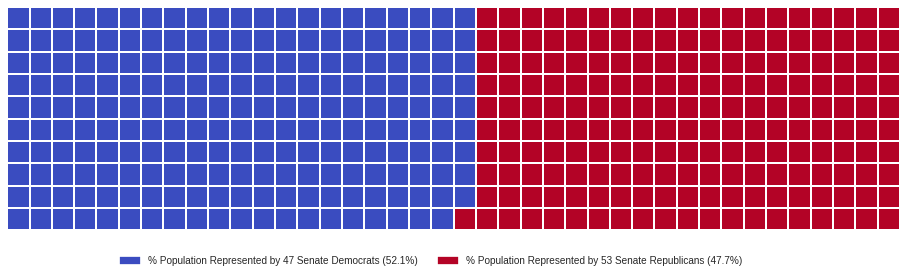

In [0]:
create_waffle_chart(categories, values, height, width, colormap, value_sign='%');

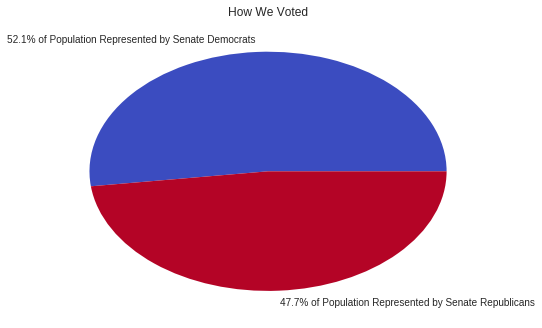

In [0]:
categories = ["52.1% of Population Represented by Senate Democrats", "47.7% of Population Represented by Senate Republicans"] # categories
values = [round((sum(df_dem.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0], 2), round((sum(df_rep.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0], 2)] # correponding values of categories
colormap = plt.cm.coolwarm
colors = colormap(np.linspace(0., 1., len(values)))
plt.title('How We Voted')
plt.pie(values, labels=categories, colors=colors);

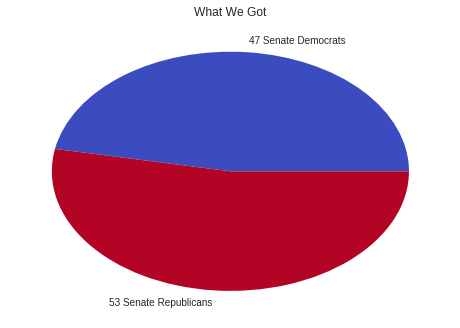

In [0]:
categories = ["47 Senate Democrats", "53 Senate Republicans"] # categories
values = [47, 53] # correponding values of categories
colormap = plt.cm.coolwarm
colors = colormap(np.linspace(0., 1., len(values)))
plt.title('What We Got')
plt.pie(values, labels=categories, colors=colors);

In [0]:
round((sum(df_dem.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0], 2)

0.52

In [0]:
dem_percent = (sum(df_dem.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0]
rep_percent = (sum(df_rep.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017)/2)/df.POPESTIMATE2017[0]
dem_pop = dem_percent * df.POPESTIMATE2017[0]
rep_pop = rep_percent * df.POPESTIMATE2017[0]
dem_avg = dem_pop / 47
dem_avg

3611341.712765957

In [0]:
rep_avg = rep_pop / 53
rep_avg

2930040.4811320757

Assuming each senator represents half their state, the average Democratic senator (including independents who caucus with the Democrats) represents about 3.6 million people, while the average Republican senator represents 2.9 million people.

In [0]:
dem_percent = (sum(df_dem.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017))/df.POPESTIMATE2017[0]
rep_percent = (sum(df_rep.POPESTIMATE2017) + sum(df_both.POPESTIMATE2017))/df.POPESTIMATE2017[0]
dem_pop = dem_percent * df.POPESTIMATE2017[0]
rep_pop = rep_percent * df.POPESTIMATE2017[0]
dem_avg = dem_pop / 47
dem_avg

4164108.276595745

In [0]:
rep_avg = rep_pop / 47
rep_avg

3856854.765957447

In [0]:
df_least_populous = df.sort_values(['POPESTIMATE2017'])[:26]
df_least_populous

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2017,SENPARTY2019
55,40,4,8,56,Wyoming,579315,Republicans
50,40,1,1,50,Vermont,623657,Democrats
13,40,3,5,11,District of Columbia,693972,NaN
6,40,4,9,2,Alaska,739795,Republicans
39,40,2,4,38,North Dakota,755393,Republicans
46,40,2,4,46,South Dakota,869666,Republicans
12,40,3,5,10,Delaware,961939,Democrats
31,40,4,8,30,Montana,1050493,Both
44,40,1,1,44,Rhode Island,1059639,Democrats
24,40,1,1,23,Maine,1335907,Both


In [0]:
df_least_populous.POPESTIMATE2017.sum()

53244153

In [0]:
(df_least_populous.POPESTIMATE2017.sum() - 693972) / df.POPESTIMATE2017[0] # Population of 26 least populous states (subtracting pop. of DC) divided US population

0.16133585170720283

Half the senate represents about one-sixth of the population.

In [0]:
df_most_populous = df.sort_values(['POPESTIMATE2017'])[26:]
df_most_populous

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2017,SENPARTY2019
23,40,3,7,22,Louisiana,4684333,Republicans
5,40,3,6,1,Alabama,4874747,Both
45,40,3,5,45,South Carolina,5024369,Republicans
28,40,2,4,27,Minnesota,5576606,Democrats
10,40,4,8,8,Colorado,5607154,Both
54,40,2,3,55,Wisconsin,5795483,Both
25,40,3,5,24,Maryland,6052177,Democrats
30,40,2,4,29,Missouri,6113532,Republicans
19,40,2,3,18,Indiana,6666818,Republicans
47,40,3,6,47,Tennessee,6715984,Republicans


In [0]:
39536653/325719178

0.12138263777639768

In [0]:
28304596/325719178

0.08689877020382263